In [1]:
import tools as tools
import classifier as classify
import fitting as fit
import ResonanceMethods as rem
import ResonancePipeline
from ResonancePipeline import ResonancePipeline

import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
USBdirectory = '/Volumes/POCKETLAB/LSI/data/'
directory = 'data/'
folder = '2024-03-14/'
target_dir = 'output/'+folder

res = ResonancePipeline(USBdirectory, folder, target_dir)

In [24]:
res.load_data(type='txt', mac = True)

Available folders:  ['Analyse14Mar24Meas2Ana0.txt', 'Analyse14Mar24Meas3Ana0.txt', 'Analyse14Mar24Meas4Ana0.txt', 'Analyse14Mar24Meas5Ana0.txt']
Available data files in data_folder:  dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


In [25]:
data_dictionary = res.data_dictionary
print(res.data_dictionary.keys())

dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


Select file from dictionary to analyse using the appropriate filename as a string

In [26]:
filename = 'Analyse14Mar24Meas5Ana0'
datafile = data_dictionary[filename]

Classify data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


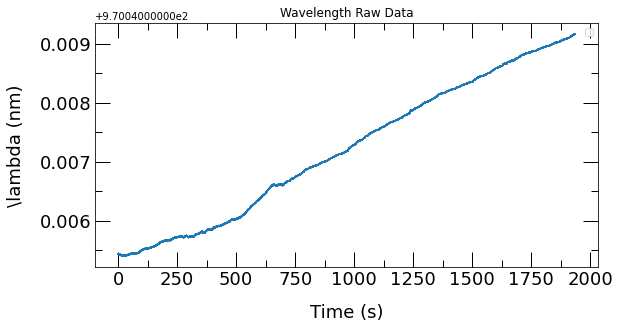

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


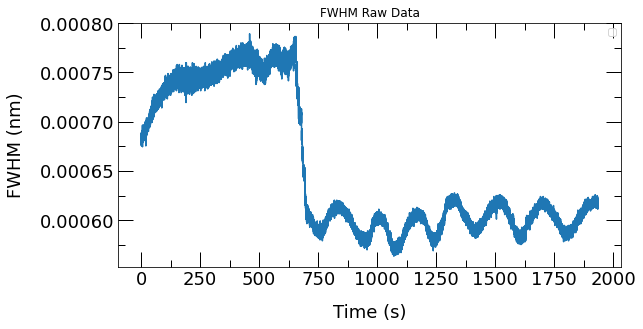

In [27]:
data_parameters = res.classify_data(datafile)

time = res.data_parameters['time']
resonance = res.data_parameters['resonance']
fwhm = res.data_parameters['fwhm']

Remove errors in data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


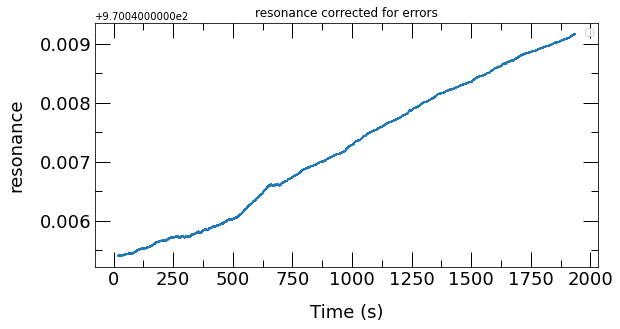

dict_keys(['time', 'resonance', 'fwhm', 'resonance_cut'])


In [11]:
data_parameter = 'resonance'
error_range = [0, 1000]

res.remove_errors(time, data_parameter, error_range)
print(res.data_parameters.keys())

Background correction if file available

Baseline =  970.0472139232294


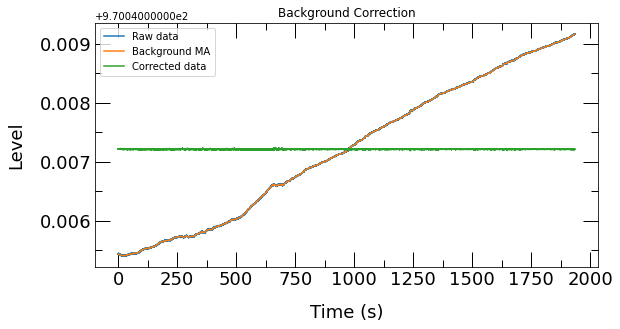

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


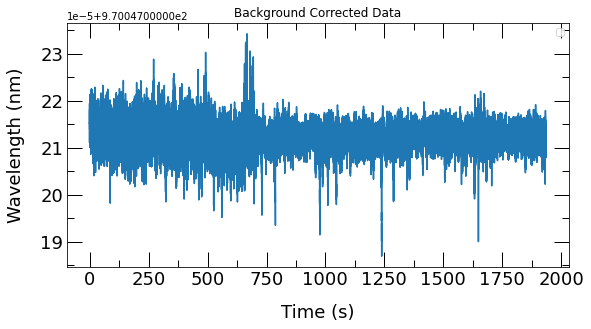

dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


In [8]:
data_parameter = 'resonance'
window_size = 100

res.correct_background(data_parameter, window_size)
print(res.data_dictionary.keys())

# Step Finder

0  windows to sample
0  peak maxima found at t =  []
0  peak minima found at t =  []
0 []
0 []
0
0 []


/Users/sabrinaperrenoud/Desktop/Lab/JupyterNotebook/fitting.py:1216: RuntimeWarning: Mean of empty slice
  convolutions -= np.nanmean(convolutions)
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


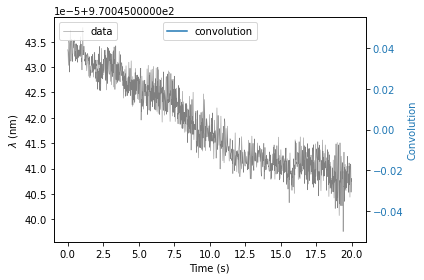

In [19]:
x = res.data_parameters['time']
y = res.data_parameters['resonance']
interval = [0, 1000]
window_size = len(y)

res.find_signal(x, y, type = 'steps', interval=interval, window_size=window_size)

# Spike Finder

0  windows to sample
0  peak maxima found at t =  []
0  peak minima found at t =  []
0 []
0 []
0
0 []


/Users/sabrinaperrenoud/Desktop/Lab/JupyterNotebook/fitting.py:1216: RuntimeWarning: Mean of empty slice
  convolutions -= np.nanmean(convolutions)
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


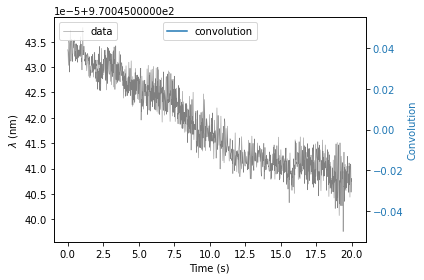

In [20]:
res.find_signal(x, y, type = 'spikes', interval=interval, window_size=window_size)

In [29]:
filename = 'spikes_resonance_parameters.npy'
res.load_signal_parameters(filename)

res.signal_parameters
print(res.signal_parameters.keys())

dict_keys(['maxima', 'minima', 'step_indices', 'steps', 'steps_excluded', 'delta_lambda', 'convolutions'])
